# ADULT DATA SET

In [123]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [124]:
#acquiring the column names
columns = []
file_name = 'adult_names.txt'
with open(file_name,'r') as f:
    file_stuff = f.readlines()
    for i in file_stuff:
        if ord(i[0]) >= ord('a') and ord(i[0]) <= ord('z'):
            str = ""
            j = 0
            while i[j] != ':':
                str += i[j]
                j+=1
            columns.append(str)
# adding a last column of dependent variable:
columns.append('income')
print(columns)

['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']


In [125]:
df = pd.read_csv('adult_train.csv',names = columns)

In [126]:
df.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


## Division of dependent and Independent variables :

In [127]:
# looking at the ratio of data set : 
print(df['income'].value_counts())

 <=50K    24720
 >50K      7841
Name: income, dtype: int64


In [128]:
# assigning output in form of classes : 
# 0 : <= 50k
# 1 : > 50k
df['income'] = [0 if x == ' <=50K' else 1 for x in df['income']]

In [129]:
# dividing data set into input and output : 
X = df.drop('income',1) # 1 respresnts y axies
Y = df.income

In [130]:
X.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States


In [131]:
Y.head(10)

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    1
8    1
9    1
Name: income, dtype: int64

## Making categorical data binary classes:

In [132]:
# Data Cleaning :
print(X['education'].head())

0     Bachelors
1     Bachelors
2       HS-grad
3          11th
4     Bachelors
Name: education, dtype: object


In [133]:
# since education is a categorical class we need to get the values of all unique  education encoded:
# this can also be achieved via HotEncoder in sci-kit learn
print(pd.get_dummies(X['education'].head(10)))
# this makes a class for each of the categorical 

    11th   9th   Bachelors   HS-grad   Masters
0      0     0           1         0         0
1      0     0           1         0         0
2      0     0           0         1         0
3      1     0           0         0         0
4      0     0           1         0         0
5      0     0           0         0         1
6      0     1           0         0         0
7      0     0           0         1         0
8      0     0           0         0         1
9      0     0           1         0         0


## Working on classes distribution :

In [134]:
#Checking unique categories for each attribute : 
cat_list = []
for col in X.columns:
    if X[col].dtype == 'object':
        cat_list.append(col)
        cat_value = len(X[col].unique())
        print("{col}-->{cat_value} unique values".format(col=col, cat_value = cat_value))

workclass-->9 unique values
education-->16 unique values
marital-status-->7 unique values
occupation-->15 unique values
relationship-->6 unique values
race-->5 unique values
sex-->2 unique values
native-country-->42 unique values


In [135]:
for col in X.columns:
    print(X[col].dtype) # only categorical values will be object since they will have quotes in them

int64
object
int64
object
int64
object
object
object
object
object
int64
int64
int64
object


In [136]:
outer = []
for col in X.columns:
    if X[col].dtype != 'object':
        outer.append(X[col])

## Working on Missing Values :

In [137]:
## find the missing values and change them to median or mode depending upon your choice !!
for col in df.columns:
    counts = df[col].value_counts().to_dict()
    for i in counts.keys():
        if i == ' ?':
            print(col,"has",counts[i],"missing/unknown values")

workclass has 1836 missing/unknown values
occupation has 1843 missing/unknown values
native-country has 583 missing/unknown values


In [138]:
#from sklearn.preprocessing import Imputer  # this class is depreciated so use this instead
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values = ' ?', strategy = 'most_frequent')
imp.fit(X)
X = pd.DataFrame(data = imp.transform(X), columns = X.columns)

In [139]:
for col in X.columns:
    counts = X[col].value_counts().to_dict()
    for i in counts.keys():
        if i == ' ?':
            print(col,"has",counts[i],"missing/unknown values")
# we can see no values found with ? therefor the values are eliminated 

In [140]:
#observing class with most unique value to see if there is a bias and reducing the redundant work : 
print(X['native-country'].value_counts().sort_values(ascending = False).head(10))

 United-States    29753
 Mexico             643
 Philippines        198
 Germany            137
 Canada             121
 Puerto-Rico        114
 El-Salvador        106
 India              100
 Cuba                95
 England             90
Name: native-country, dtype: int64


In [141]:
# since the values are most towards United_States there is a need to reduce the values 
X['native-country'] = ['United-States' if i == ' United-States' else 'Other' for i in X['native-country']]
print(X['native-country'].value_counts().sort_values(ascending = False).head(10))

United-States    29753
Other             2808
Name: native-country, dtype: int64


In [142]:
print(X['education'].value_counts().sort_values(ascending = False).head(10))
# other values are pretty comparable in frequency so we need to differentiate the classes with dummies

 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
Name: education, dtype: int64


## Processing the data to get the values ready for training 

In [143]:
# writing a function to dummy all categorical variables used for modeling 
def dummy_creator(df,dummy_list):
    for x in dummy_list:
        dummies = pd.get_dummies(df[x],prefix = x,dummy_na = False) # prefix makes the name of the column !
        #print(dummies)
        df = df.drop(x,1)
        df = pd.concat([df,dummies],axis = 1)
    return df

In [144]:
X = dummy_creator(X,cat_list)

In [145]:
X.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,...,relationship_ Wife,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male,native-country_Other,native-country_United-States
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,1,0,1,0,1
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,1,0,1,0,1
2,38,215646,9,0,0,40,0,0,0,1,...,0,0,0,0,0,1,0,1,0,1
3,53,234721,7,0,0,40,0,0,0,1,...,0,0,0,1,0,0,0,1,0,1
4,28,338409,13,0,0,40,0,0,0,1,...,1,0,0,1,0,0,1,0,1,0


## Checking for missing values in metric data :

In [146]:
# models cannot handle missing data 
# simplest solution : remove that observation ....but if data is less it might be worrisome
#                     also it might lead to losing potentially important data
#                     Data is also non-randomly missing : in addition to losing we might introduce some bias

# alternate solution :
# replace missing value with another value: mean, median or mode
X.isnull().sum().sort_values(ascending = False).head()

native-country_United-States    0
education_ 12th                 0
marital-status_ Divorced        0
education_ Some-college         0
education_ Prof-school          0
dtype: int64

## Detecting Outlieres :
Since Outliers are generally found in metric data we find them here using scatter plot 

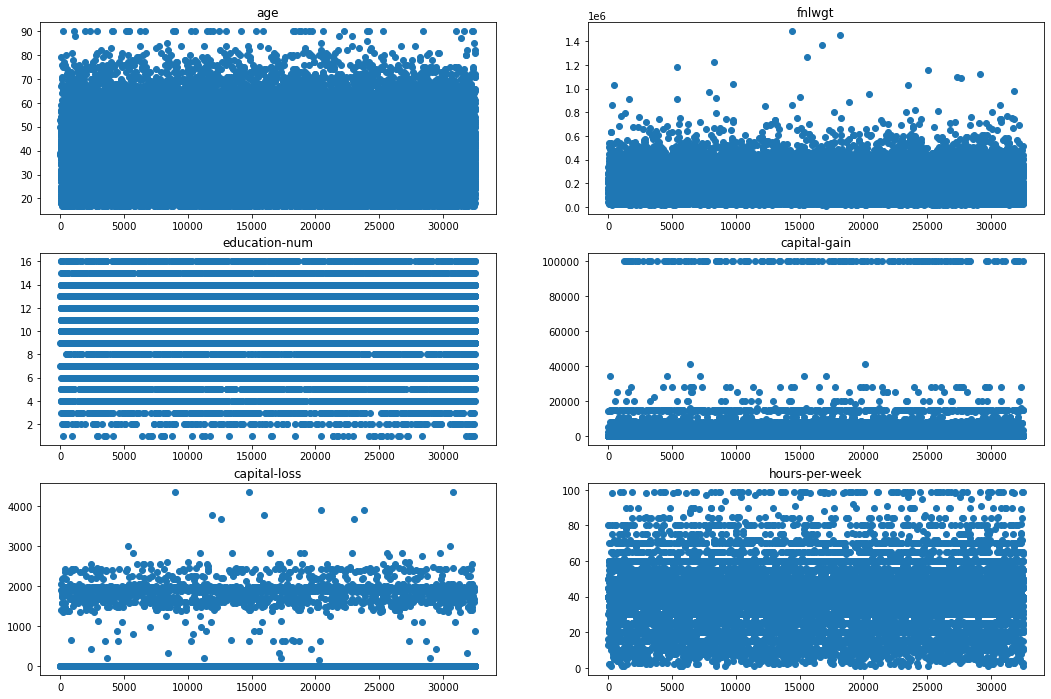

In [147]:
# since we have 6 values here we can make subplots and view how the outliers are visible or not :
%matplotlib inline 
nrows,ncols = 3,2
fig = plt.gcf()
fig.set_size_inches(nrows*6,ncols*6)
j = 0
for i in outer:
    sp = plt.subplot(nrows,ncols,j+1)
    j += 1
    sp.axis('on')
    plt.scatter(np.array(range(len(i.to_numpy()))),i.to_numpy())
    plt.title('{}'.format(i.name))

### From the above PLOTs it is clear that we have some outliers as : 
#### Possible Natural Outliers : **age**, **hours per week** 
#### Error Outliers : **fnlwgt** , **capital-gain** , **capital-loss**

--------------------------------------------------------------------------------------------------------------------------

## Normalizing data set : 
Since all the categorical values have been separated for data set we can normalize the whole dataset

In [160]:
# normalize dataset b/w 0 and 1 :
normalize_data_1 = X/(X.max() - X.min())

In [162]:
normalize_data_1.head(10)

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,...,relationship_ Wife,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male,native-country_Other,native-country_United-States
0,0.534247,0.0526453,0.866667,0.0217402,0,0.408163,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
1,0.684932,0.056581,0.866667,0,0,0.132653,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
2,0.520548,0.146457,0.6,0,0,0.408163,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
3,0.726027,0.159412,0.466667,0,0,0.408163,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
4,0.383562,0.229832,0.866667,0,0,0.408163,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
5,0.506849,0.193275,0.933333,0,0,0.408163,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
6,0.671233,0.108792,0.333333,0,0,0.163265,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
7,0.712329,0.142379,0.6,0,0,0.459184,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
8,0.424658,0.0310924,0.933333,0.140841,0,0.510204,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
9,0.575342,0.10829,0.866667,0.0517805,0,0.408163,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


#### Now that the values are all between 0 and 1 , our data is normalized and ready to be trained with a machine learning model 